In [8]:
import pandas as pd

file_path = "financial_fraud_detection_dataset.csv"
data = pd.read_csv(file_path)

df_sample = data.sample(frac=0.001, random_state=42)
print(df_sample.head())

        transaction_id                   timestamp sender_account  \
3577888       T3677888  2023-04-09T20:06:09.254118      ACC529887   
4993932       T5093932  2023-07-16T05:26:15.162082      ACC872160   
4094900       T4194900  2023-12-13T19:04:47.539751      ACC403211   
4420497       T4520497  2023-12-15T12:06:09.051479      ACC313245   
634465         T734465  2023-11-19T21:33:24.238666      ACC570417   

        receiver_account  amount transaction_type merchant_category location  \
3577888        ACC346873   11.67         transfer            online   London   
4993932        ACC767192  184.31          payment             other    Tokyo   
4094900        ACC536309  930.34          deposit            travel  Toronto   
4420497        ACC322871    0.01       withdrawal        restaurant   Berlin   
634465         ACC246664  131.16       withdrawal        restaurant    Dubai   

        device_used  is_fraud fraud_type  time_since_last_transaction  \
3577888         pos     False  

In [9]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3577888 to 116544
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   transaction_id               5000 non-null   object 
 1   timestamp                    5000 non-null   object 
 2   sender_account               5000 non-null   object 
 3   receiver_account             5000 non-null   object 
 4   amount                       5000 non-null   float64
 5   transaction_type             5000 non-null   object 
 6   merchant_category            5000 non-null   object 
 7   location                     5000 non-null   object 
 8   device_used                  5000 non-null   object 
 9   is_fraud                     5000 non-null   bool   
 10  fraud_type                   188 non-null    object 
 11  time_since_last_transaction  4110 non-null   float64
 12  spending_deviation_score     5000 non-null   float64
 13  velocity_score 

In [10]:
print(df_sample.describe())

            amount  time_since_last_transaction  spending_deviation_score  \
count  5000.000000                  4110.000000               5000.000000   
mean    358.026574                   -38.390955                 -0.001154   
std     469.585806                  3598.186694                  0.987040   
min       0.010000                 -8491.237652                 -3.100000   
25%      25.175000                 -2587.742421                 -0.672500   
50%     136.350000                   -44.281577                  0.020000   
75%     504.970000                  2569.616199                  0.670000   
max    2708.290000                  8278.482289                  3.740000   

       velocity_score  geo_anomaly_score  
count     5000.000000        5000.000000  
mean        10.578000           0.504660  
std          5.737988           0.290232  
min          1.000000           0.000000  
25%          6.000000           0.260000  
50%         11.000000           0.510000  
75%  

In [11]:
if 'is_fraud' in df_sample.columns:
    fraud_counts = df_sample['is_fraud'].value_counts()
    print("\nFraudulent vs Non-Fraudulent Transactions:")
    print(fraud_counts)


Fraudulent vs Non-Fraudulent Transactions:
is_fraud
False    4812
True      188
Name: count, dtype: int64


In [12]:
print(data.isnull().sum())

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

Processed 0 transactions
Processed 100 transactions
Processed 200 transactions
Processed 300 transactions
Processed 400 transactions
Processed 500 transactions
Processed 600 transactions
Processed 700 transactions
Processed 800 transactions
Processed 900 transactions
Processed 1000 transactions
Processed 1100 transactions
Processed 1200 transactions
Processed 1300 transactions
Processed 1400 transactions
Processed 1500 transactions
Processed 1600 transactions
Processed 1700 transactions
Processed 1800 transactions
Processed 1900 transactions
Processed 2000 transactions
Processed 2100 transactions
Processed 2200 transactions
Processed 2300 transactions
Processed 2400 transactions
Processed 2500 transactions
Processed 2600 transactions
Processed 2700 transactions
Processed 2800 transactions
Processed 2900 transactions
Processed 3000 transactions
Processed 3100 transactions
Processed 3200 transactions
Processed 3300 transactions
Processed 3400 transactions
Processed 3500 transactions
Proc

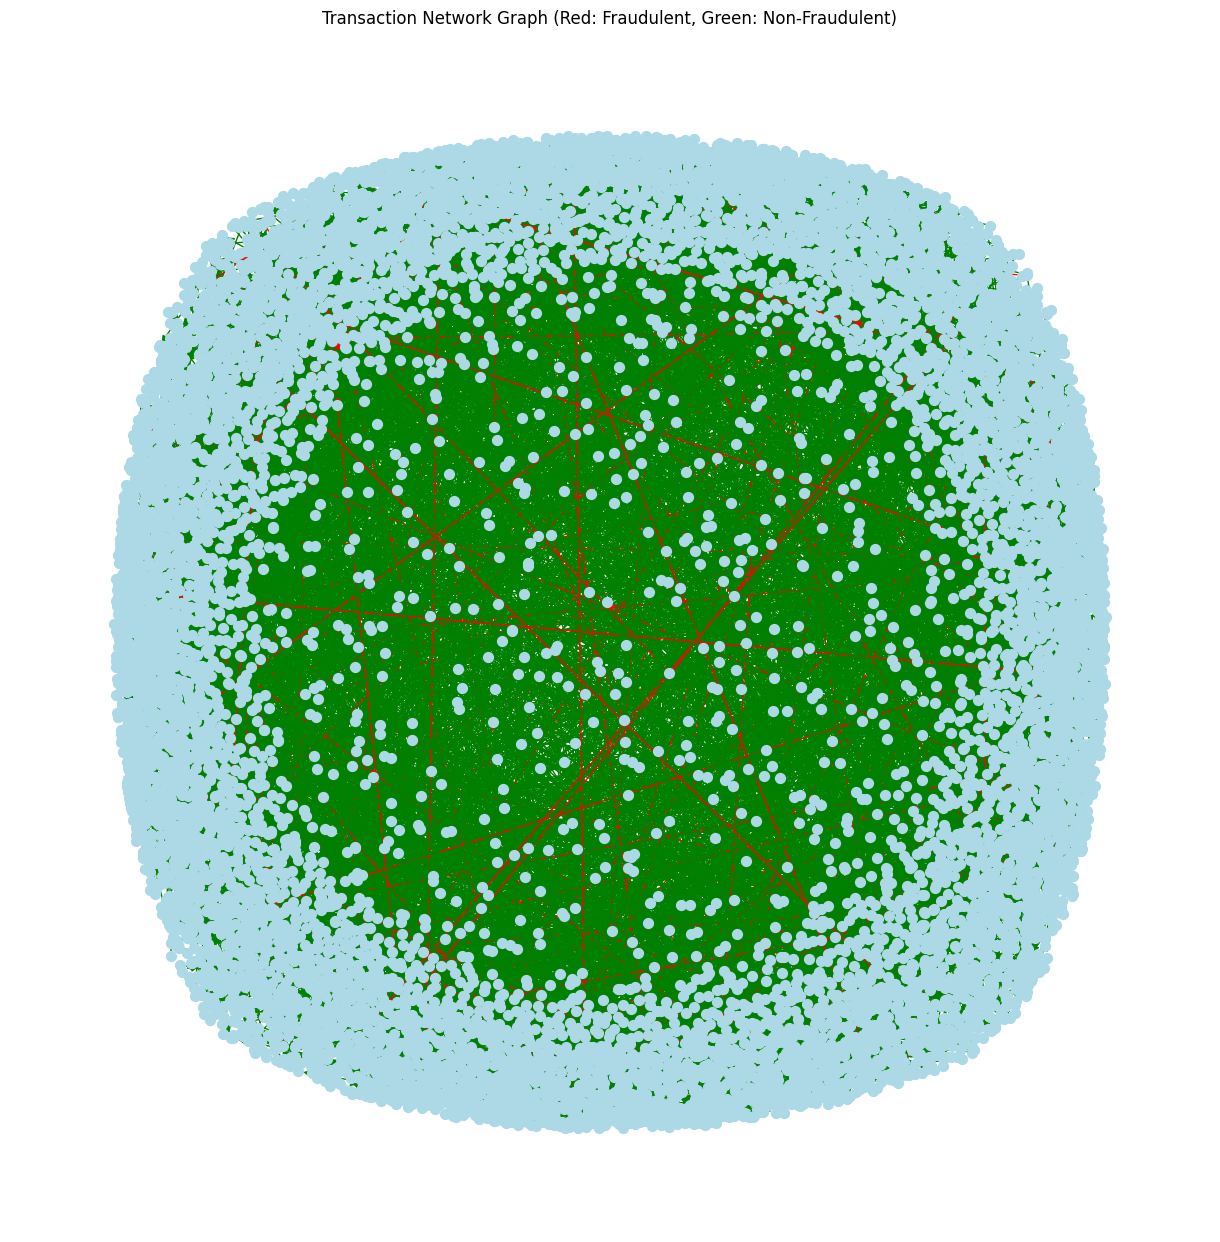

In [18]:
G = nx.DiGraph()

i=0
for _, row in df_sample.iterrows():
    G.add_edge(
        row['sender_account'],
        row['receiver_account'],
        amount=row['amount'],
        transaction_type=row['transaction_type'],
        fraud=row['is_fraud']
    )
    if i%100 == 0:
        print(f"Processed {i} transactions")
    i += 1

edge_colors = ['red' if e[2]['fraud'] else 'green' for e in G.edges(data=True)]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='lightblue', edge_color=edge_colors, arrows=True)
# edge_labels = nx.get_edge_attributes(G, 'amount')
plt.title("Transaction Network Graph (Red: Fraudulent, Green: Non-Fraudulent)")
plt.show()

In [7]:
import numpy as np
import torch_geometric
print(torch_geometric.__version__)
from torch_geometric.datasets import EllipticBitcoinDataset

dataset = EllipticBitcoinDataset(root='./dataset')
# data = dataset[0]

# data

2.7.0


Processing...
Done!


In [8]:
data = dataset[0]
print(data)

Data(x=[203769, 165], edge_index=[2, 234355], y=[203769], train_mask=[203769], test_mask=[203769])


In [9]:
print("Number of nodes:", data.num_nodes)
print("Number of edges:", data.num_edges)
print("Number of node features:", data.num_node_features)
print("Number of classes:", dataset.num_classes)
print("Node labels shape:", data.y.shape)
print("Train mask shape:", data.train_mask.shape)
print("Test mask shape:", data.test_mask.shape)


Number of nodes: 203769
Number of edges: 234355
Number of node features: 165
Number of classes: 2
Node labels shape: torch.Size([203769])
Train mask shape: torch.Size([203769])
Test mask shape: torch.Size([203769])


In [10]:
# Look at first 5 nodes
print("First 5 node features:\n", data.x[:5])
print("First 5 node labels:", data.y[:5])


First 5 node features:
 tensor([[-1.7147e-01, -1.8467e-01, -1.2014e+00, -1.2197e-01, -4.3875e-02,
         -1.1300e-01, -6.1584e-02, -1.6210e-01, -1.6793e-01, -4.9707e-02,
         -1.6440e-01, -2.8741e-02, -3.5391e-02, -4.2955e-02, -1.3282e-02,
         -5.7195e-02, -1.6961e-01, -1.7115e-01, -1.7447e-01, -1.3737e+00,
         -1.3715e+00, -1.3973e-01, -1.4891e-01, -8.0147e-02, -1.5566e-01,
         -1.0763e-02, -1.2107e-02, -1.3973e-01, -1.4891e-01, -8.0147e-02,
         -1.5566e-01, -1.0669e-02, -1.2005e-02, -2.4669e-02, -3.1272e-02,
         -2.3045e-02, -2.6215e-02,  1.4278e-03,  1.4826e-03, -2.2722e-01,
         -2.3937e-01, -7.5256e-02, -2.3495e-01,  3.7468e-02,  4.3444e-02,
         -2.2720e-01, -2.4324e-01, -9.7895e-02, -2.3590e-01,  3.6577e-02,
          4.2345e-02, -4.1401e-01, -4.8834e-01, -2.3255e-01, -4.6755e-01,
          4.8767e-02,  5.2956e-02, -3.9149e-02, -1.7290e-01, -1.6313e-01,
         -1.6093e-01, -1.3163e+00, -1.3154e+00, -3.9144e-02, -1.7288e-01,
         -1.63

In [11]:
# Check first 5 edges
print("First 5 edges:\n", data.edge_index[:, :5])

First 5 edges:
 tensor([[0, 2, 4, 6, 8],
        [1, 3, 5, 7, 9]])


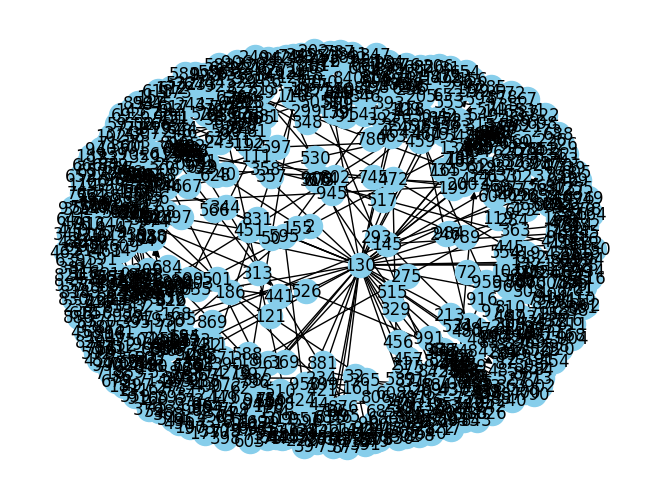

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert first 1000 nodes + edges to NetworkX graph
subgraph_nodes = range(1000)
subgraph = data.edge_index[:, (data.edge_index[0] < 1000) & (data.edge_index[1] < 1000)]
G = nx.DiGraph()
G.add_edges_from(subgraph.t().tolist())
nx.draw(G, with_labels=True, node_color='skyblue', node_size=300)
plt.show()

In [15]:
import torch
labels, counts = torch.unique(data.y, return_counts=True)
label_map = {0: 'licit', 1: 'illicit', 2: 'unknown'}
print("Label distribution:")
for l, c in zip(labels.tolist(), counts.tolist()):
    print(f"{label_map.get(l, l)}: {c}")

Label distribution:
licit: 42019
illicit: 4545
unknown: 157205


In [16]:
illicit_nodes = (data.y == 1).nonzero(as_tuple=True)[0]
print("\nFirst 10 illicit transaction node IDs:", illicit_nodes[:10].tolist())


First 10 illicit transaction node IDs: [907, 1361, 2718, 2815, 3423, 4881, 5037, 5120, 5438, 6255]


In [17]:
print("\nFeature vector of first illicit transaction:")
print(data.x[illicit_nodes[0]])


Feature vector of first illicit transaction:
tensor([-1.7267e-01,  4.8298e-02, -1.2014e+00, -1.2197e-01, -4.3875e-02,
        -1.1300e-01, -6.1584e-02, -1.6332e-01, -1.6914e-01, -4.9707e-02,
        -1.6562e-01, -2.8741e-02, -3.5391e-02, -4.2955e-02, -1.3282e-02,
        -5.6486e-02, -1.7089e-01, -1.7269e-01, -1.7589e-01, -1.3737e+00,
        -1.3715e+00, -1.3973e-01, -1.4891e-01, -8.0147e-02, -1.5566e-01,
        -1.0763e-02, -1.2107e-02, -1.3973e-01, -1.4891e-01, -8.0147e-02,
        -1.5566e-01, -1.0669e-02, -1.2005e-02, -2.4669e-02, -3.1272e-02,
        -2.3045e-02, -2.6215e-02,  1.4278e-03,  1.4826e-03, -2.2718e-01,
        -2.3933e-01, -7.5256e-02, -2.3491e-01,  3.7468e-02,  4.3444e-02,
        -2.2716e-01, -2.4320e-01, -9.7895e-02, -2.3586e-01,  3.6577e-02,
         4.2345e-02, -4.0497e-01, -4.8082e-01, -2.3255e-01, -4.5888e-01,
         4.8767e-02,  5.2956e-02, -3.9151e-02, -1.7289e-01, -1.6313e-01,
        -1.6093e-01, -1.3163e+00, -1.3154e+00, -3.9146e-02, -1.7288e-01,
     

In [18]:
anomaly_mask = torch.zeros(data.num_nodes, dtype=torch.long)
anomaly_mask[data.y == 1] = 1  # label illicit transactions as anomalies
print("\nAnomaly mask for first 20 nodes:", anomaly_mask[:20].tolist())


Anomaly mask for first 20 nodes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
